In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)

dat.train = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STAT503/hw/diabetes_train.csv"))
dat.test = read.csv(file = file.path("C:/Users/Vance He/Desktop/UMich/2020_WN/STAT503/hw/diabetes_test.csv"))

Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"

In [2]:
dim(dat.train)
dim(dat.test)

[1] 428   9

[1] 108   9

Check missing rates and variable ranges.For some variables, it is impossible to be 0, so we regard those 0s as missing values.<br>

In [3]:
summary(dat.train)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:103.0   1st Qu.: 64.00   1st Qu.: 0.00  
 Median : 3.000   Median :123.0   Median : 72.00   Median :22.50  
 Mean   : 4.054   Mean   :124.8   Mean   : 69.67   Mean   :20.07  
 3rd Qu.: 7.000   3rd Qu.:145.0   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :114.00   Max.   :99.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:27.88   1st Qu.:0.2537           1st Qu.:25.00  
 Median :  0.00   Median :32.50   Median :0.4025           Median :31.00  
 Mean   : 84.07   Mean   :32.55   Mean   :0.5023           Mean   :34.33  
 3rd Qu.:130.00   3rd Qu.:36.80   3rd Qu.:0.6750           3rd Qu.:41.25  
 Max.   :846.00   Max.   :59.40   Max.   :2.4200           Max.   :81.00  
    Ou

### Data exploration

check the data distribution of train dataset

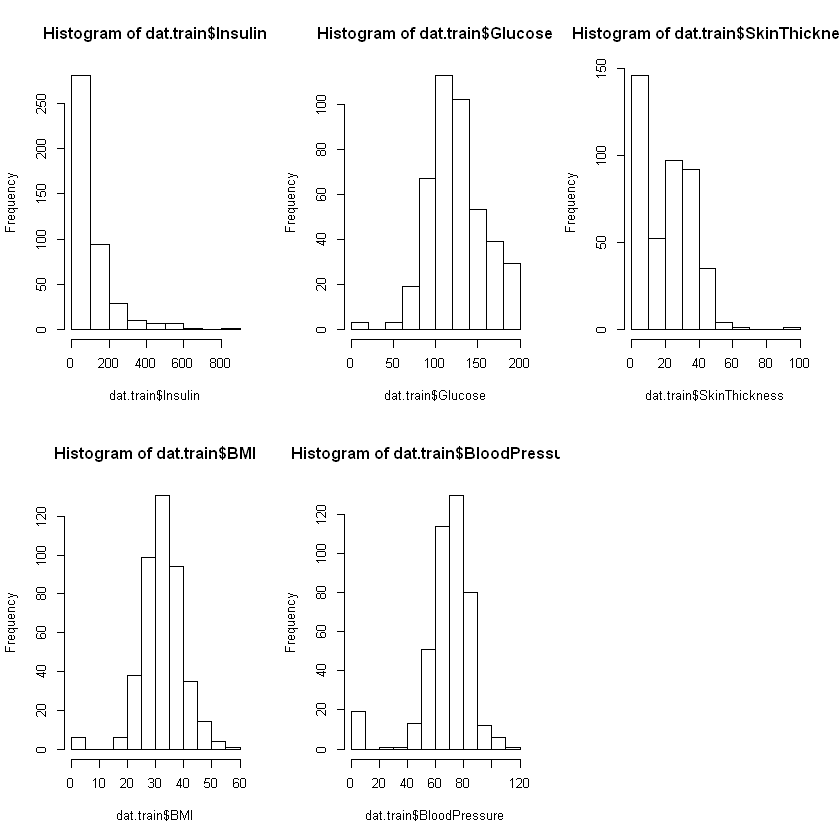

In [4]:
par(mfcol = c(2,3))
hist(dat.train$Insulin)
hist(dat.train$BMI)
hist(dat.train$Glucose)
hist(dat.train$BloodPressure)
hist(dat.train$SkinThickness)

Similarly,check the data distribution of test dataset

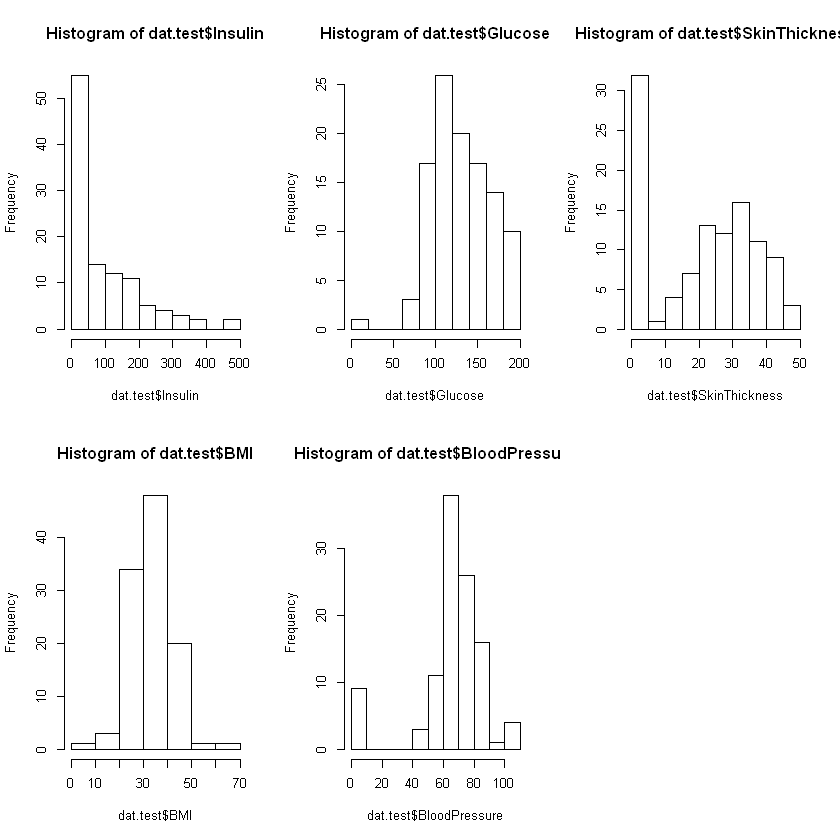

In [5]:
par(mfcol = c(2,3))
hist(dat.test$Insulin)
hist(dat.test$BMI)
hist(dat.test$Glucose)
hist(dat.test$BloodPressure)
hist(dat.test$SkinThickness)

From histograms above, we could see SkinThickness and Insulin have most 0 values, so we may exclude them in our model, and replace missing values with corresponding mean or median for other variables.

In [6]:
mean(dat.train$BloodPressure)
median(dat.train$BloodPressure)

[1] 69.6729

[1] 72

In [7]:
dat.train$BloodPressure[dat.train$BloodPressure == 0] = median(dat.train$BloodPressure)
dat.train$Glucose[dat.train$Glucose == 0] = mean(dat.train$Glucose)
dat.train$BMI[dat.train$BMI == 0] = mean(dat.train$BMI)

In [8]:
summary(dat.train)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   : 44.0   Min.   : 30.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:104.0   1st Qu.: 65.00   1st Qu.: 0.00  
 Median : 3.000   Median :123.0   Median : 72.00   Median :22.50  
 Mean   : 4.054   Mean   :125.6   Mean   : 72.87   Mean   :20.07  
 3rd Qu.: 7.000   3rd Qu.:145.0   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :114.00   Max.   :99.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   :18.20   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:28.18   1st Qu.:0.2537           1st Qu.:25.00  
 Median :  0.00   Median :32.55   Median :0.4025           Median :31.00  
 Mean   : 84.07   Mean   :33.01   Mean   :0.5023           Mean   :34.33  
 3rd Qu.:130.00   3rd Qu.:36.80   3rd Qu.:0.6750           3rd Qu.:41.25  
 Max.   :846.00   Max.   :59.40   Max.   :2.4200           Max.   :81.00  
    Ou

In [9]:
#do same thing to test dataset
summary(dat.test)

  Pregnancies       Glucose      BloodPressure    SkinThickness  
 Min.   : 0.00   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.00   1st Qu.:106.5   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.00   Median :129.0   Median : 70.00   Median :25.00  
 Mean   : 3.75   Mean   :130.4   Mean   : 66.52   Mean   :21.15  
 3rd Qu.: 6.00   3rd Qu.:154.5   3rd Qu.: 78.50   3rd Qu.:33.00  
 Max.   :13.00   Max.   :198.0   Max.   :110.00   Max.   :46.00  
    Insulin            BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.00   Min.   : 0.00   Min.   :0.0840           Min.   :21.00  
 1st Qu.:  0.00   1st Qu.:28.40   1st Qu.:0.2517           1st Qu.:24.00  
 Median : 45.50   Median :32.60   Median :0.3925           Median :29.50  
 Mean   : 88.75   Mean   :33.04   Mean   :0.4748           Mean   :33.02  
 3rd Qu.:151.25   3rd Qu.:37.05   3rd Qu.:0.6338           3rd Qu.:39.25  
 Max.   :480.00   Max.   :67.10   Max.   :1.8930           Max.   :69.00  
    Outcome  

In [10]:
dat.test$BloodPressure[dat.test$BloodPressure == 0] = median(dat.train$BloodPressure)
dat.test$Glucose[dat.test$Glucose == 0] = mean(dat.train$Glucose)
dat.test$BMI[dat.test$BMI == 0] = mean(dat.train$BMI)

In [11]:
# new dataset dimension
dim(dat.train)
dim(dat.test)

[1] 428   9

[1] 108   9

See correlations

In [12]:
cor(dat.train$Outcome,dat.train)
cor(dat.test$Outcome,dat.test)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.2580393,0.4670871,0.1656376,0.1010146,0.1134862,0.3285728,0.1700104,0.2691153,1


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.2432467,0.5692847,0.3359822,0.1624546,0.1748755,0.3740483,0.1231927,0.221376,1


### KNN modeling

In [13]:
library(class)

In [14]:
train_label = dat.train %>% .$Outcome
train_x = dat.train %>% select("Pregnancies","Glucose","BloodPressure","BMI","Age","DiabetesPedigreeFunction")

test_label = dat.test %>% .$Outcome
test_x = dat.test %>% select("Pregnancies","Glucose","BloodPressure","BMI","Age","DiabetesPedigreeFunction")

In [15]:
mean_train = colMeans(train_x)
std_train = sqrt(diag(var(train_x)))
# training_data
train_x = scale(train_x,center = mean_train,scale = std_train)
# test data
test_x = scale(test_x,center = mean_train,scale = std_train)

In [16]:
set.seed(1)
pred_train = knn(train_x,train_x,train_label,k=1)
pred_test = knn(train_x,test_x,train_label,k=1)

The table() function can be used to produce a confusion matrix in order to determine how many observations were correctly or incorrectly classified.

In [17]:
# Pull out the true responses for the test data
table(pred_train, train_label)

          train_label
pred_train   0   1
         0 223   0
         1   0 205

In [18]:
mean(pred_train != train_label)

[1] 0

In [19]:
table(pred_test, test_label)

         test_label
pred_test  0  1
        0 31 24
        1 14 39

In [20]:
mean(pred_test != test_label)

[1] 0.3518519

The testing results using K = 1 are not very good compared to training errors, which means we have strong overfit. We further seek a best K.<br>

In [21]:
k_range = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20)
train_error = c()
test_error = c()
for(i in 1:length(k_range)){
    set.seed(18)
    pred_train = knn(train_x,train_x,train_label,k=k_range[i])
    pred_test = knn(train_x,test_x,train_label,k=k_range[i])
    train_error[i] = mean(pred_train != train_label)
    test_error[i] = mean(pred_test != test_label)
}

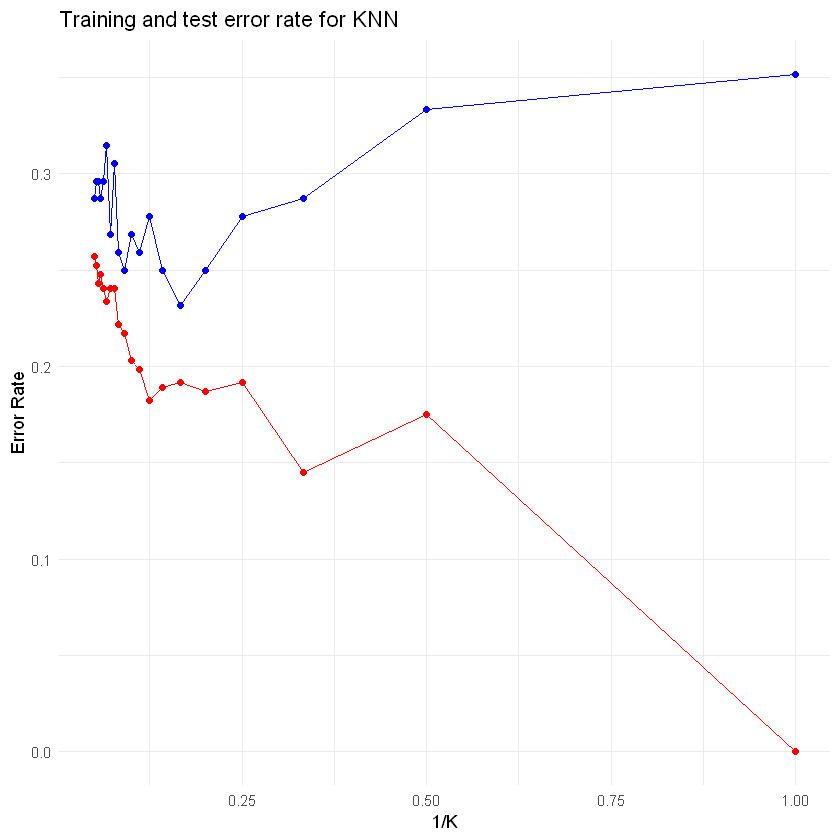

In [22]:
errors = data.frame(train_error, test_error, k_range)
ggplot(errors,aes(x = 1/k_range)) +
geom_line(aes(y=train_error),col = "red")+geom_point(aes(y=train_error),col = "red")+
geom_line(aes(y=test_error),col = "blue")+geom_point(aes(y=test_error),col = "blue")+
ylab("Error Rate") + xlab("1/K") + ggtitle("Training and test error rate for KNN")+theme_minimal()


In [23]:
train_error = format(round(train_error,2),nsmall = 2)

In [24]:
train_error

[1] "0.00" "0.18" "0.14" "0.19" "0.19" "0.19" "0.19" "0.18" "0.20" "0.20"
[11] "0.22" "0.22" "0.24" "0.24" "0.23" "0.24" "0.25" "0.24" "0.25" "0.26"

In [25]:
test_error = format(round(test_error,2),nsmall = 2)

In [26]:
result = data.frame("K" = k_range, "Train Error" = train_error, "Test Error" = test_error)

In [27]:
t(result[,1:ncol(result)])

K,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Train.Error,0.00,0.18,0.14,0.19,0.19,0.19,0.19,0.18,0.20,0.20,0.22,0.22,0.24,0.24,0.23,0.24,0.25,0.24,0.25,0.26
Test.Error,0.35,0.33,0.29,0.28,0.25,0.23,0.25,0.28,0.26,0.27,0.25,0.26,0.31,0.27,0.31,0.30,0.29,0.30,0.30,0.29
